In [1]:
from sklearn.cluster import AffinityPropagation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score,)
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('data.csv')

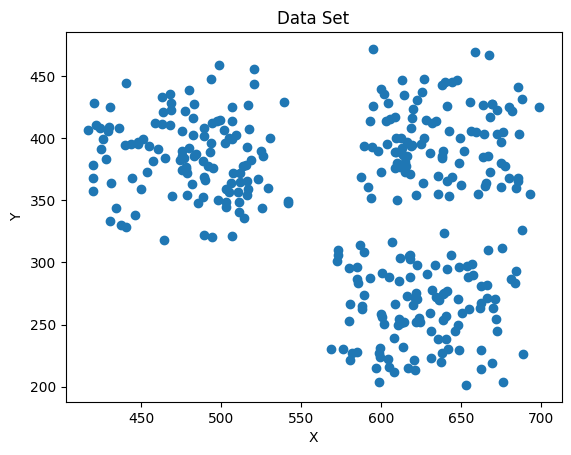

In [4]:
#plot the dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [5]:
# in this function we try to evaluate the kmeans algorithm with different metrices to find the optimal number of cluster
def evaluate_preferences(data, preferences: list)->tuple:
    silhouette,davies_bouldin,calinski_harabasz = [],[],[]
    for preference in preferences:
        cluster  = AffinityPropagation(preference=-preference,damping=0.5,max_iter=250,random_state=0, convergence_iter=50)
        cluster.fit(data)

        silhouette.append(round(silhouette_score(data, cluster.labels_),4))
        davies_bouldin.append(round(davies_bouldin_score(data, cluster.labels_),4))
        calinski_harabasz.append(round(calinski_harabasz_score(data, cluster.labels_),4))
    return (silhouette,davies_bouldin,calinski_harabasz)

In [6]:
n_clusters = np.arange(100,300,10)
results = evaluate_preferences(data, n_clusters)

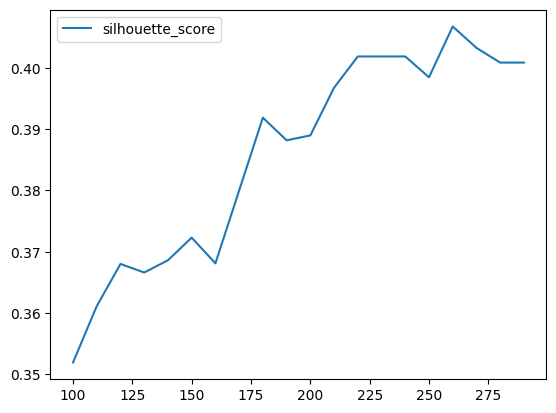

In [7]:
"""The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 
It ranges from -1 to 1, where higher values indicate better clustering."""

plt.plot(n_clusters,results[0],label='silhouette_score')
plt.legend()
plt.show()

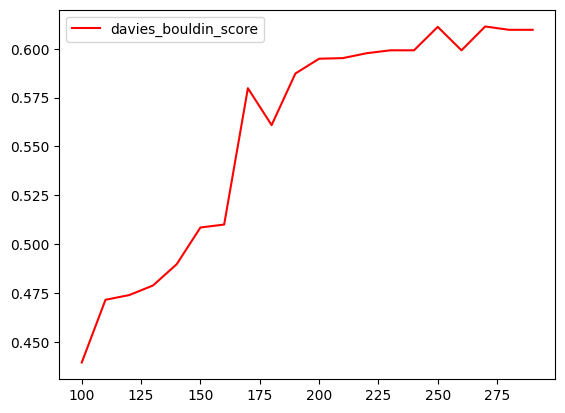

In [8]:
"""The Davies-Bouldin Index is the average similarity ratio of each cluster with 
its most similar cluster, where lower values indicate better clustering."""

plt.plot(n_clusters,results[1],label='davies_bouldin_score',color='red')
plt.legend()
plt.show()


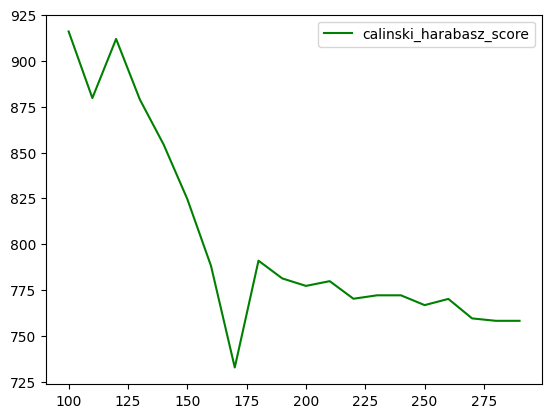

In [9]:
"""The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is the ratio of 
the sum of between-cluster dispersion and within-cluster dispersion. Higher values indicate better clustering."""

plt.plot(n_clusters,results[2],label='calinski_harabasz_score',color='green')
plt.legend()
plt.show()

In [10]:
# the optimal number of preference is aproximately -259 which gives the best results
cluster  = AffinityPropagation(preference=-259,damping=0.5,random_state=42)
cluster.fit(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster.labels_),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster.labels_),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster.labels_),4))

the best silhouette_score = 0.4068
the best davies_bouldin_score = 0.5992
the best calinski_harabasz_score = 770.2666


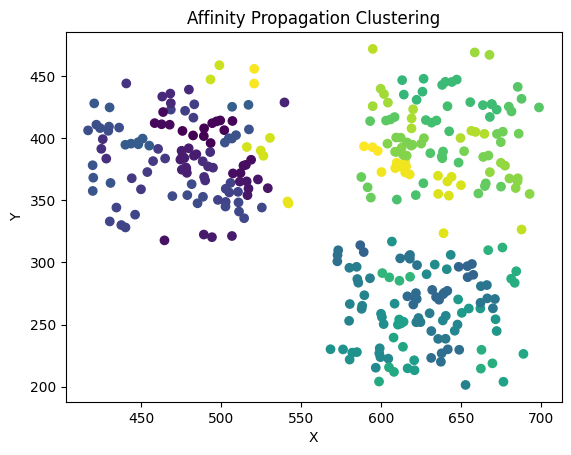

In [11]:
# plot the cluster 

plt.scatter(data['X'],data['Y'],c=cluster.labels_)
plt.title('Affinity Propagation Clustering')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()